Notebook for doing some analysis on the ebike project

In [152]:
import numpy as np
class bike:
    def __init__(self,tireRadius=0.7/2,tireWidth = 0.025, wheelRadius = 0.622/2, mass_wheel_f = 0.66, mass_wheel_r = 0.83, mass_tire_f = 0.24, mass_tire_r = 0.24,mass_frame = 0.8, UCI_max_mass = 6.8, mass_rider = 63, frontalArea = 0.37, CoD = 0.88, density_air = 1.225,gravity=9.81,rollingResistanceCoef = 0.005 ):
        self.tireRadius = tireRadius # UCI limits are 0.55m to 0.7m
        self.tireWidth = tireWidth # UCI maximum is 0.033m
        self.wheelRadius = wheelRadius
        self.mass_wheel_f = mass_wheel_f #kg
        self.mass_wheel_r = mass_wheel_r #kg
        self.mass_tire_f = mass_tire_f#kg
        self.mass_tire_r = mass_tire_r #kg
        self.inertia_f = (self.mass_wheel_f+self.mass_tire_f)*self.wheelRadius**2 #kg*m2
        self.inertia_r = (self.mass_wheel_f+self.mass_tire_f)*self.wheelRadius**2 #kg*m2
        self.mass_frame =mass_frame #kg
        self.UCI_max_mass = UCI_max_mass #kg
        self.mass_UCI_non_rotating = self.UCI_max_mass - (self.mass_wheel_f+self.mass_tire_f + self.mass_wheel_f+self.mass_tire_f)
        self.mass_rider =mass_rider #kg
        self.velocity = 0
        self.mass_bike = self.UCI_max_mass
        self.totalMass = self.mass_rider+self.mass_bike
        self.frontalArea = frontalArea
        self.CoD = CoD
        self.density_air = density_air
        self.gravity = gravity
        self.rollingResistanceCoef = rollingResistanceCoef
    def setVelocity(self,velocity):
        self.velocity = velocity
    def getKineticEnergy(self):
        self.KE = 1/2*self.totalMass*self.velocity**2+1/2*(self.inertia_f+self.inertia_r)*(self.velocity/self.tireRadius)**2
        return self.KE
    def getAeroDragForce(self):
        self.Fd_aero = self.velocity**2*self.density_air*self.CoD*self.frontalArea*0.5
        return self.Fd_aero
    def getRollingDragForce(self):
        self.Fd_rolling = self.rollingResistanceCoef*self.gravity*self.totalMass
        return self.Fd_rolling
    def getDragPower(self):
        self.dragPower = (self.Fd_rolling+self.Fd_aero)*self.velocity
        return self.dragPower

In [153]:
myBike = bike()
print(myBike.getKineticEnergy())
myBike.setVelocity(11)
print(myBike.getKineticEnergy())
print(myBike.getAeroDragForce())
print(myBike.getRollingDragForce())
print(myBike.getDragPower())

0.0
4308.882995102041
24.131030000000003
3.42369
303.10192000000006


In [154]:
atmosphericDensity3point5psiCO2minus40C = 44*0.23/(0.0821*233)
print(atmosphericDensity3point5psiCO2minus40C)

0.5290313811796564


In [155]:
print(0.529/1.225)

0.43183673469387757


In [156]:
#assuming terraformed mars atmosphere and using the current human powered land speed record bicycle
eta = bike(mass_rider = 100,CoD = 0.05,density_air = 0.55,gravity=9.81*0.38,rollingResistanceCoef = 0.0015)
eta.setVelocity(1000/2.25)
print(eta.getKineticEnergy())
print(eta.getAeroDragForce())
print(eta.getRollingDragForce())
print(eta.getDragPower())

10688514.225245653
1004.9382716049384
0.59719356
446904.65118441713


In [157]:
80*24

1920

https://en.wikipedia.org/wiki/Orbital_speed

In [174]:
#orbital velocity at lunar surface
GM_moon = 4.9048695*10**12 # standard gravitational parameter m^3*s^-2
radius_moon = 1738.1*1000 # equatorial radius in meters
orbitalVelocity = math.sqrt(GM_moon/radius_moon)
print('Orbital velocity at the lunar surface is: ',orbitalVelocity,' m/s.')
equatorialCircumferance_moon = radius_moon*2*math.pi
print('Circumferance of the moon at the equator is: ',equatorialCircumferance_moon/1000,' km')

Orbital velocity at the lunar surface is:  1679.872608532767  m/s.
Circumferance of the moon at the equator is:  10920.804382408838  km


In [170]:
100*0.5*(1000/2.25)**2/250/60/60 #time to reach 1000mph on a bicycle on the moon assuming 250 w output and no resistance

10.973936899862826

Battery pack reference: https://chargedevs.com/newswire/gm-reveals-more-technical-details-of-its-ultium-battery-packs/

In [171]:
cellLength = 23*0.0254 #m
cellWidth = 4*0.0254 #m x 
cellHeight = 0.4*0.0254 #m 
cellMass = 3/2.2 #kg
cellCapacity = 0.37 #kWh
cellsPerPack = 10
batteryPackEnergy = cellCapacity*3600*1000*cellsPerPack
additionalMassPerPack = 10
batteryPackMass = cellMass*cellsPerPack+additionalMassPerPack
driveMassPerStage = 15

stage mass: 38.63636363636363
starting mass:  879.7272727272726
final velocity:  1715.654716889641
total time in hours:  24.666666666666668
wheel speed in rpm:  3276.659145982951
266400000.0
216628011.10663605
0.8131682098597449
distance from average acceleration:  74044.0769148406  km
average v:  788.7349239276016
distance from average v:  70039.66124477102  km
distance from summing average v per stage times time per stage:  66230.90777327602  km
time to charge packs at 250w pedaling:  296.0  hours
number of "orbits" to reach orbital speed:  6.064654713526444


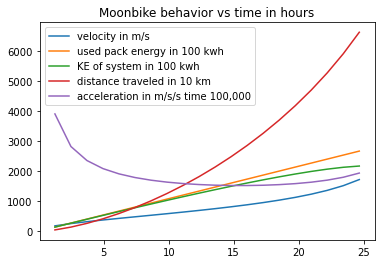

In [207]:
import math
import numpy as np
import matplotlib.pyplot as plt
moonBike = bike(tireRadius=5,tireWidth = 0.025, wheelRadius = 4.9/2, mass_wheel_f = 3, mass_wheel_r = 4)
numStages = 20
v = 0
stageMass = batteryPackMass + driveMassPerStage
print('stage mass:', stageMass)
riderMass = 100
time = 0
maxPower = 3000 #watts
usedPackEnergy = 0
KE = 0
v_rec = np.zeros(numStages)
time_rec = np.zeros(numStages)
usedPackEnergy_rec = np.zeros(numStages)
KE_rec = np.zeros(numStages)
approximateDistance = np.zeros(numStages)
approximateAcceleration = np.zeros(numStages)
distance = 0
for i in range(numStages):
    mass = riderMass+stageMass*(numStages-i)+moonBike.mass_wheel_f+moonBike.mass_wheel_r
    v = math.sqrt((batteryPackEnergy+KE)*2/(mass+(moonBike.inertia_f+moonBike.inertia_r)/moonBike.tireRadius))
    KE = 1/2*mass*v**2+1/2*(moonBike.inertia_f+moonBike.inertia_r)*(v/moonBike.tireRadius)**2
    usedPackEnergy +=batteryPackEnergy
    timeStage = batteryPackEnergy/maxPower
    time += timeStage
    dV = v-v_rec[i]
    if i>0:
        dD = (v_rec[i-1]+v)/2*timeStage #average speed for stage times stage time
    else:
        dD = (v)/2*timeStage #average speed for stage times stage time
    distance += dD
    approximateDistance[i] = distance
    approximateAcceleration[i] = dV/time
    v_rec[i] = v
    time_rec[i] = time
    usedPackEnergy_rec[i] = usedPackEnergy
    KE_rec[i] = KE
    
print('starting mass: ', stageMass*numStages+riderMass+moonBike.mass_wheel_f+moonBike.mass_wheel_r)
print('final velocity: ',v)
print('total time in hours: ', time/3600)
wheelSpeedHz = (v/(2*math.pi*moonBike.tireRadius))
print('wheel speed in rpm: ',wheelSpeedHz*60)
totalPackEnergy = numStages*batteryPackEnergy
finalKE = 1/2*mass*v**2+1/2*(moonBike.inertia_f+moonBike.inertia_r)*(v/moonBike.tireRadius)**2
print(totalPackEnergy)
print(finalKE)
print(finalKE/totalPackEnergy)
plt.title('Moonbike behavior vs time in hours')
plt.plot(time_rec/3600,v_rec,label='velocity in m/s')
plt.plot(time_rec/3600,usedPackEnergy_rec/100000,label='used pack energy in 100 kwh')
plt.plot(time_rec/3600, KE_rec/100000,label='KE of system in 100 kwh')
plt.plot(time_rec/3600,approximateDistance/1000/10,label='distance traveled in 10 km')
plt.plot(time_rec/3600,approximateAcceleration*100000,label='acceleration in m/s/s time 100,000')
plt.legend()
print('distance from average acceleration: ',(1/2*np.average(approximateAcceleration)*time**2)/1000, ' km')
print('average v: ', np.average(v_rec))
print('distance from average v: ',np.average(v_rec)*time/1000,' km' )
print('distance from summing average v per stage times time per stage: ', max(approximateDistance/1000),' km')
print('time to charge packs at 250w pedaling: ',usedPackEnergy/250/3600,' hours')
print('number of "orbits" to reach orbital speed: ',max(approximateDistance)/equatorialCircumferance_moon)

In [120]:
Crr = (3.9*10**-5)*9.81*200

In [121]:
Crr*2500

191.29500000000002

In [119]:
180/12

15.0

In [126]:
z = 0.000000007 #sinkage
d = 5 #wheel diameter
Crr = math.sqrt(z/d)
print(Crr)

#https://en.wikipedia.org/wiki/Rolling_resistance
Crr = 0.0643988/(2.2*200*(d*39.37)**0.25)
print(Crr)

3.7416573867739416e-05
3.907430333065748e-05
